<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [21.4 Simpson's Rule](chapter21.04-Simpsons-Rule.ipynb) | [Contents](Index.ipynb) | [21.6 Summary and Problems](chapter21.06-Summary-and-Problems.ipynb) >

# Computing Integrals in Python

The $scipy.integrate$ sub-package has several functions for computing integrals. The $trapz$ takes as input arguments an array of function values $f$ computed on a numerical grid $x$.

**TRY IT!** Use the $trapz$ function to approximate $\int_{0}^{\pi}\text{sin}(x)dx$ for 11 equally spaced points over the whole interval. Compare this value to the one computed in the early example using the Trapezoid Rule. 

In [1]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094542
1.9835235375094546


Sometimes we want to know the approximated cumulative integral. That is, we want to know $F(X) = \int_{x_0}^X f(x) dx$. For this purpose, it is useful to use the $cumtrapz$ function $cumsum$, which takes the same input arguments as $trapz$. 

**TRY IT!** Use the $cumtrapz$ function to approximate the cumulative integral of $f(x) = \text{sin}(x)$ from $0$ to $\pi$ with a discretization step of 0.01. The exact solution of this integral is $F(x) = sin(x)$. Plot the results. 

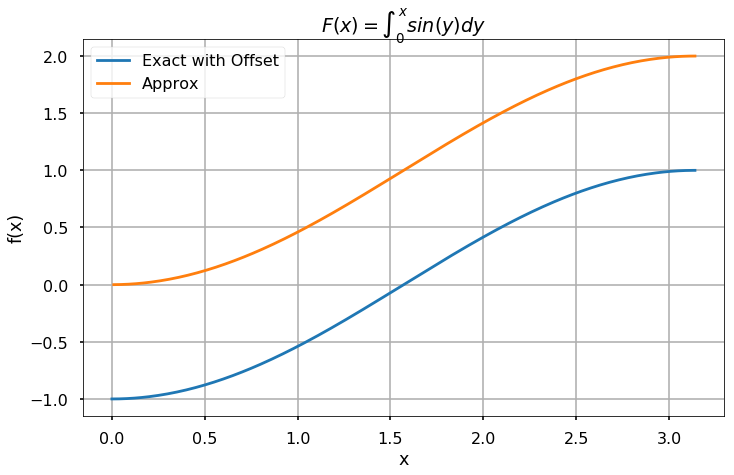

In [2]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

The $quad(f,a,b)$ function uses a different numerical differentiation scheme to approximate integrals. $quad$ integrates the function defined by the function object, $f$, from $a$ to $b$.

**TRY IT!** Use the $integrate.quad$ function to compute $\int_{0}^{\pi} \text{sin}(x)dx$. Compare your answer with the correct answer of 2.

In [3]:
from scipy.integrate import quad 

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0


<!--NAVIGATION-->
< [21.4 Simpson's Rule](chapter21.04-Simpsons-Rule.ipynb) | [Contents](Index.ipynb) | [21.6 Summary and Problems](chapter21.06-Summary-and-Problems.ipynb) >